# **Lab 4**<br>

The purpose of today's lab is to obtain a practical understanding of how to visualize the Frequency domain representation of a signal and what we can understand from it. Also, we will be implementing basic digital filters and see them in action.

Execute the following cell to load the sample audio:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io.wavfile import read, write
from scipy.fftpack import fft, ifft
from scipy.fftpack import fftfreq
from IPython.display import Audio

Fs, x = read('StarWars3.wav')
N = len(x)
print('Sample count: ', N)
print('Sampling freq: ', Fs)
Audio(x, rate=Fs)

Sample count:  66150
Sampling freq:  22050


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We can visualize the time domain amplitudes as follows:

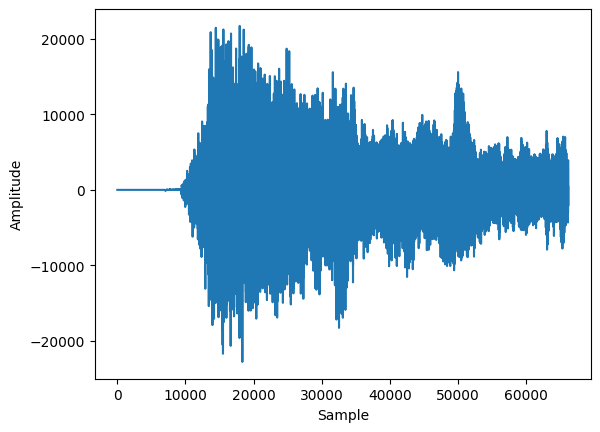

In [22]:
import librosa
import librosa.display
from scipy.fft import fft, fftfreq
from scipy.signal import butter, sosfilt
plt.figure
plt.plot(x)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

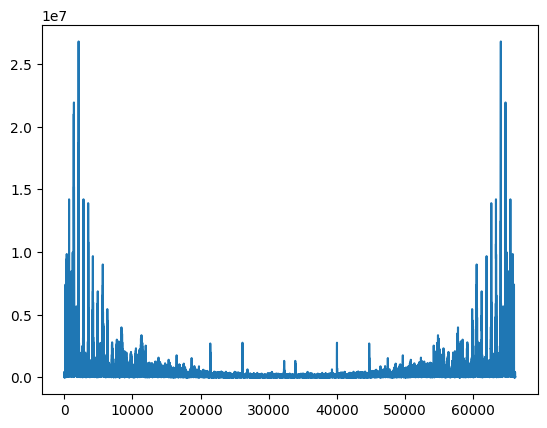

In [23]:
X = fft(x)
plt.plot(np.abs(X))

/usr/local/lib/python3.10/dist-packages/IPython/lib/display.py:159: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


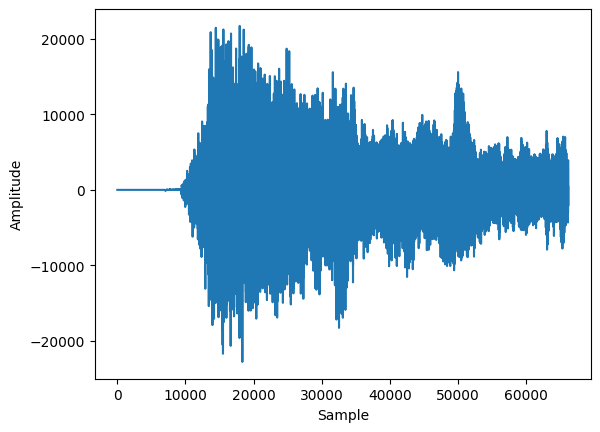

In [6]:
x_new = ifft(X)

Audio(x_new, rate=Fs)
plt.figure
plt.plot(x_new)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

##Task 1
Write a function named lowPass() that takes the time domain input signal $x$ and the cutoff frequency $f$ and returns the output signal $y$ where all the frequencies above $f$ are removed.

For the previous audio sample, apply your implemented low pass filter on this audio with a cutoff frequency of 15000. Plot the frequency response of the filtered audio sample and play the filtered audio.

In [69]:
def lowPass(x, f):
    spectrum = fft(x)
    frequencies = fftfreq(len(x), 1/Fs)

    spectrum_filtered = spectrum.copy()
    print(spectrum_filtered)
    spectrum_filtered[np.abs(frequencies) >f] = 0
    filtered_signal = np.real(np.fft.ifft(spectrum_filtered))

    return filtered_signal,spectrum_filtered

[297090.            -0.j         -49021.59944969+13418.32570553j
 -44571.30267742+19699.23346684j ... -31797.81493798-32453.64791655j
 -44571.30267742-19699.23346684j -49021.59944969-13418.32570553j]


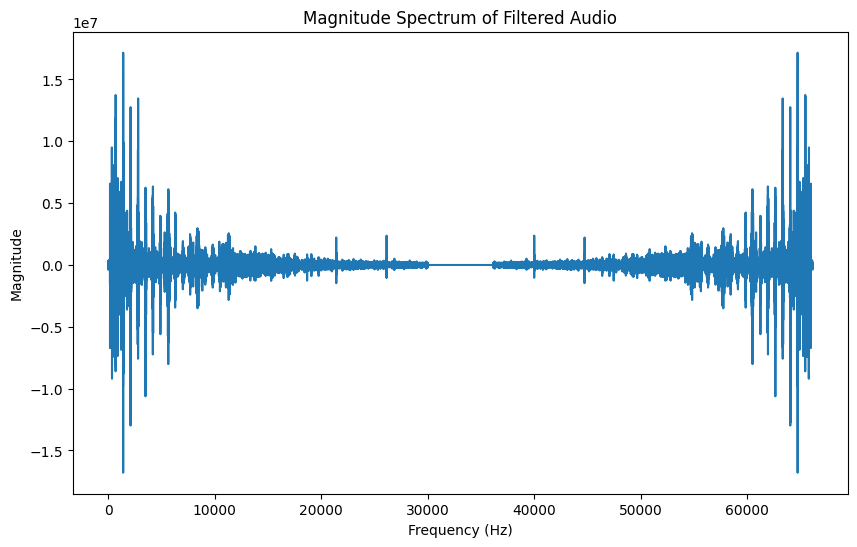

In [71]:
# Apply low-pass filter
cutoff_frequency = 10000
filtered_audio,spectrum = lowPass(x, cutoff_frequency)

magnitude_spectrum = np.abs(fft(filtered_audio))
frequencies = fftfreq(N, 1/Fs)

plt.figure(figsize=(10, 6))
plt.plot(spectrum)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of Filtered Audio')
plt.show()


Audio(filtered_audio, rate=Fs)

##Task 2
Write a function named highPass() that takes the time domain input signal $x$ and the cutoff frequency $f$ and returns the output signal $y$ where all the frequencies below $f$ are removed.


In [48]:
def highPass(x, f):
    spectrum = fft(x)
    frequencies = fftfreq(len(x), 1/Fs)

    spectrum_filtered = spectrum.copy()
    spectrum_filtered[np.abs(frequencies) <f] = 0
    filtered_signal = np.real(ifft(spectrum_filtered))

    return filtered_signal



For the previous audio sample, apply your implemented high pass filter on this audio with a cutoff frequency of 5000. Plot the frequency response of the filtered audio sample and play the filtered audio.

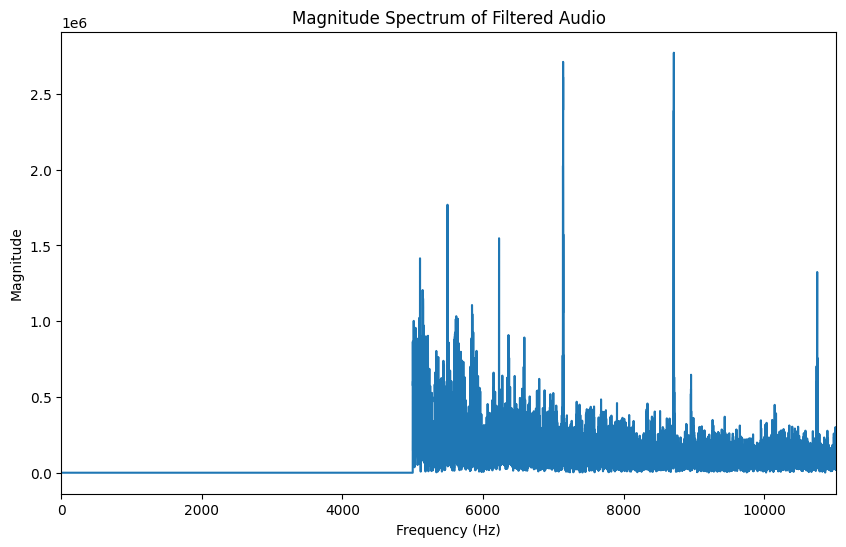

In [63]:
#Your code here
cutoff_frequency = 5000
filtered_audio = highPass(x, cutoff_frequency)
magnitude_spectrum = np.abs(fft(filtered_audio))
frequencies = fftfreq(N, 1/Fs)

plt.figure(figsize=(10, 6))
plt.plot(frequencies[:N//2], magnitude_spectrum[:N//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of Filtered Audio')
plt.xlim(0, Fs / 2)
plt.show()
Audio(filtered_audio, rate=Fs)

##Task 3
Now write a function named bandPass() that takes the time domain input signal $x$ and the cutoff frequencies $f_low$ and $f_high$ and returns the output signal $y$ where all the frequencies below $f_low$ and above $f_high$ are removed.

In [28]:
def bandPass(x, low_f, high_f):
    highpass_filtered = highPass(x, low_f,Fs)
    bandpass_filtered = lowPass(highpass_filtered, high_f, Fs)

    return bandpass_filtered

For the previous audio sample, apply your implemented band pass filter on this audio and only pass the frequencies between 5000 and 15000. Plot the frequency response of the filtered audio sample and play the filtered audio.

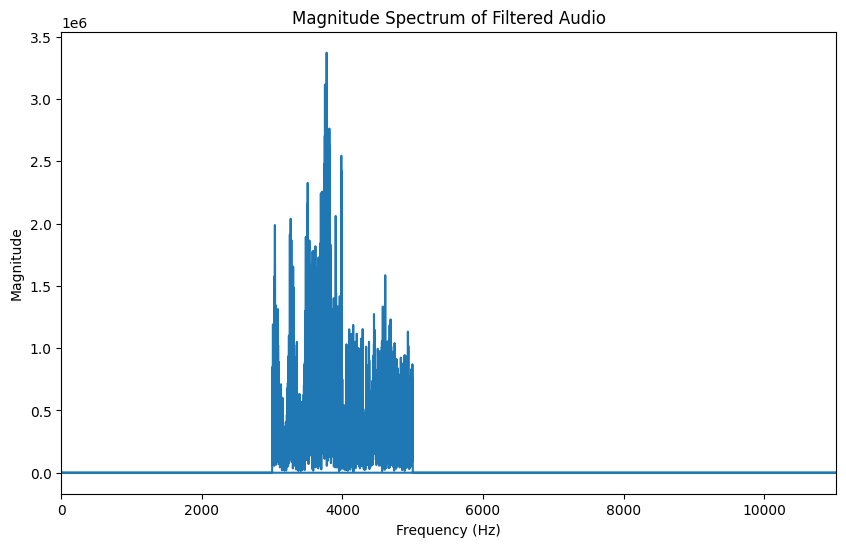

In [39]:
#Your code here
low_cutoff_frequency = 3000
high_cutoff_frequency = 5000
filtered_audio = bandPass(x, low_cutoff_frequency, high_cutoff_frequency)

magnitude_spectrum = np.abs(fft(filtered_audio))
frequencies = fftfreq(N, 1/Fs)
plt.figure(figsize=(10, 6))
plt.plot(frequencies, magnitude_spectrum)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of Filtered Audio')
plt.xlim(0, Fs / 2)
plt.show()
Audio(filtered_audio, rate=Fs)